In [47]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline  

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
# load training data

df_train = pd.read_csv('data/train.csv', delimiter=";")
df_train.head()

,EventId,Status,p13,p17,p86,p148,p440,p1023,p1034,p1061,...,p16362,p16604,p16668,p16686,p16893,p16899,p16917,p16951,p17247,p38428
0,61,0,0,3675,15,3000,3000,25.0,3000,0,...,0,0,0,0,0,0,0,0,0,-1
1,62,0,0,3630,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,69,0,0,2045,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,71,0,0,3675,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,75,0,0,3675,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [3]:
# load test data

df_test = pd.read_csv('data/test.csv', delimiter=";")
df_test.head()

,EventId,p13,p17,p86,p148,p440,p1023,p1034,p1061,p1075,...,p16362,p16604,p16668,p16686,p16893,p16899,p16917,p16951,p17247,p38428
0,79,0,1225,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,-1
1,94,0,3653,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,-1
2,98,0,3675,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,-1
3,113,0,3675,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,-1
4,1096,1,3675,0,0,0,0.0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,-1


In [4]:
df_train.shape

(41092, 88)

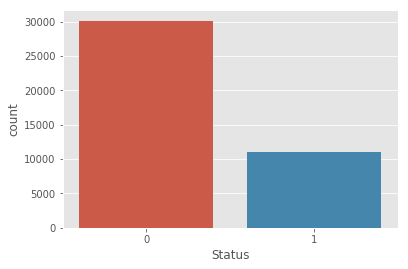

In [5]:
sns.countplot(df_train['Status'], label='Count');

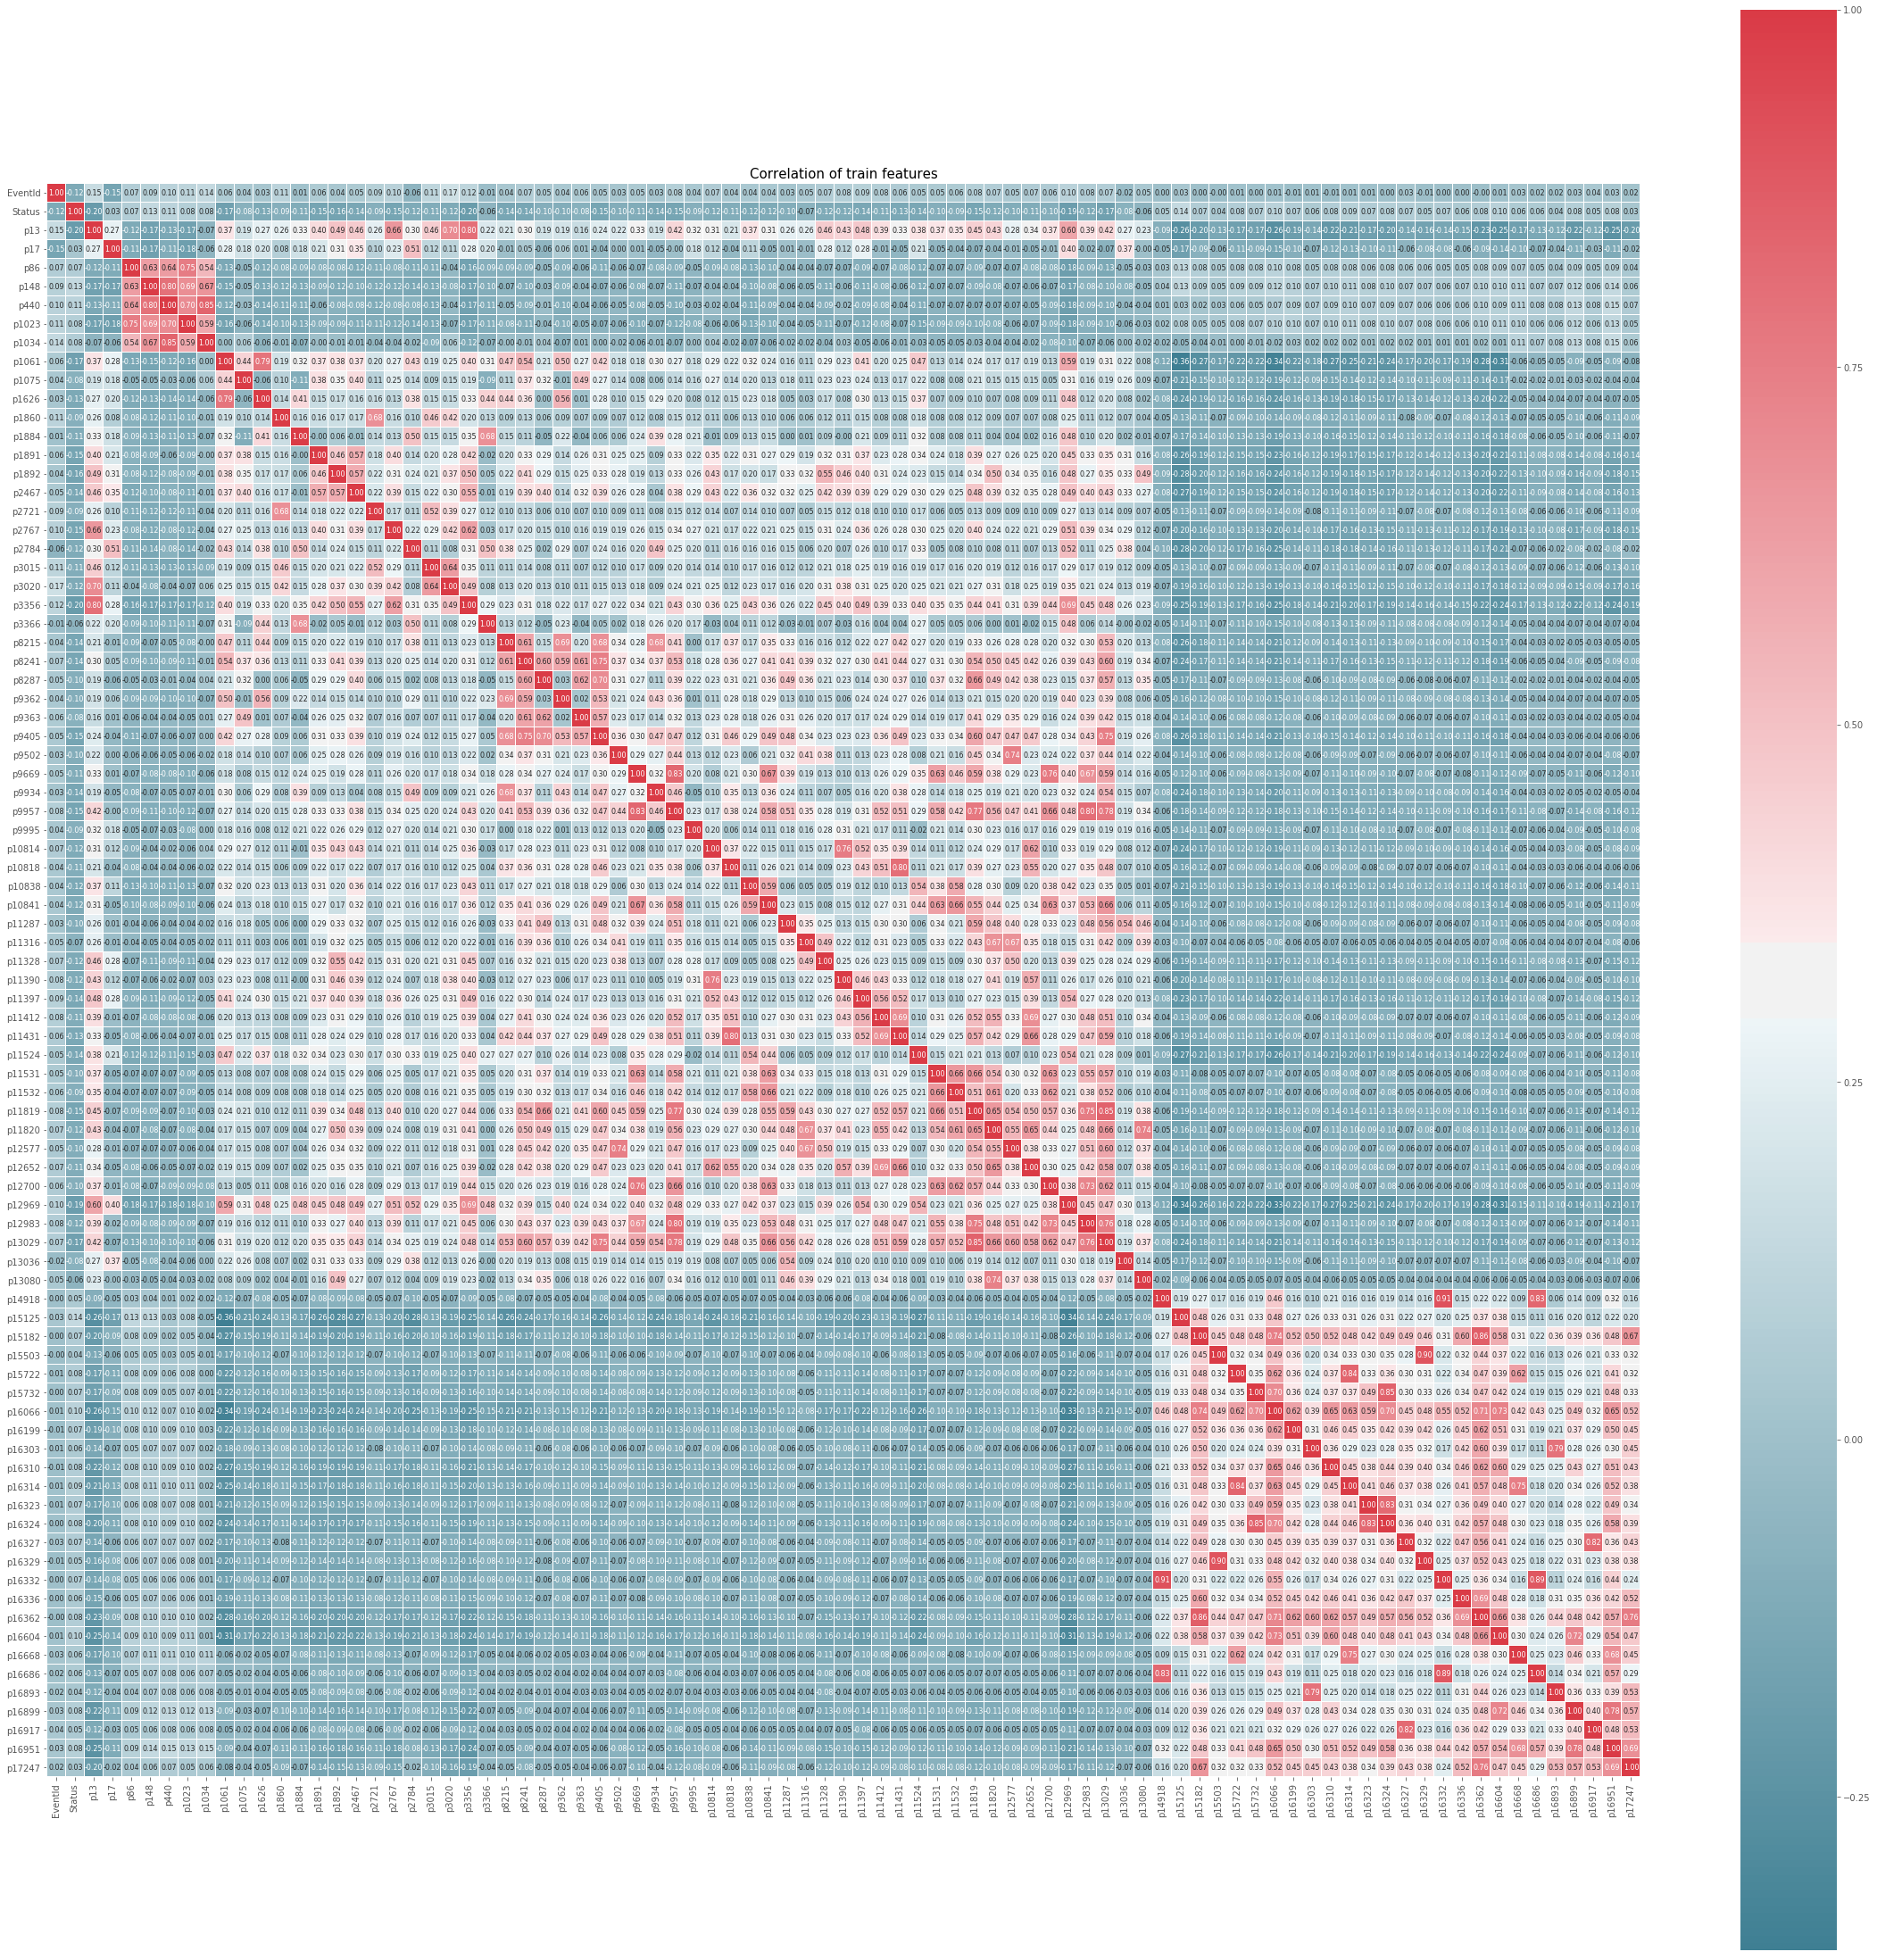

In [6]:
corr = df_train.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(40, 40))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of train features', y=1.05, size=15);

In [7]:
df_train.isnull().sum().max()
# No missing values found

0

In [8]:
# df_train.info()
df_train.columns[df_train.dtypes == 'object']

Index(['p14873', 'p14876', 'p38428'], dtype='object')

In [9]:
def mapper(el):
    return int(el) if el.isdigit() else el

def feature_p14873(df):
    df['p14873'] = list(map(mapper, df['p14873']))
    df['p14873'][df['p14873'] == 'Else'] = int(df['p14873'][df['p14873'] != 'Else'].mean())
    df['p14873'] = df['p14873'].astype('int64')

def enc_feature(df, feature, dct):
    df[feature] = df[feature].map(dct)

In [10]:
feature_p14873(df_train)
feature_p14873(df_test)

dct_p14876 = dict(zip(df_train['p14876'].unique(), 
                      range(len(df_train['p14876'].unique()))))
dct_p38428 = dict(zip(df_train['p38428'].unique(), 
                      range(len(df_train['p38428'].unique()))))

enc_feature(df_train, 'p14876', dct_p14876)
enc_feature(df_test, 'p14876', dct_p14876)

enc_feature(df_train, 'p38428', dct_p38428)
enc_feature(df_test, 'p38428', dct_p38428)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
features = df_train.columns[2:]

X_train = df_train[features]
y_train = df_train['Status']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [75]:
def bin_classify(model, clf, X_train, X_test, params=None, score=None):
    
    """Perfor Grid Search hyper parameter tuning on a classifier.
    
    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        X_train (DataFrame): The DataFrame of train X_data
        X_test (DataFrame): The DataFrame of test X_data
        params (dict): Grid Search parameters
        score (str): Grid Search score
        
    Returns:
        Tuned Clssifier object
        dataframe of model predictions and scores
    
    """
     
    
    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred
        
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return grid_search.best_estimator_, df_predictions

In [13]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):
    
    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold
        
    """
      
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  


    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []  
    for thr in thresh_roc:  
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75
    
    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    

    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []  
    for thr in thresh_prc:  
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR') 
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines') 
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



Best Parameters:
 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------------------------------
Logistic Regression 

Confusion Matrix:
[[5735  236]
 [1918  330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      5971
           1       0.58      0.15      0.23      2248

   micro avg       0.74      0.74      0.74      8219
   macro avg       0.67      0.55      0.54      8219
weighted avg       0.70      0.74      0.68      8219


Metrics:
           Logistic Regression
Accuracy              0.737924
Precision             0.583039
Recall                0.146797
F1 Score              0.234542
ROC AUC               0.729390

ROC Thresholds:

         Threshold  TP  F

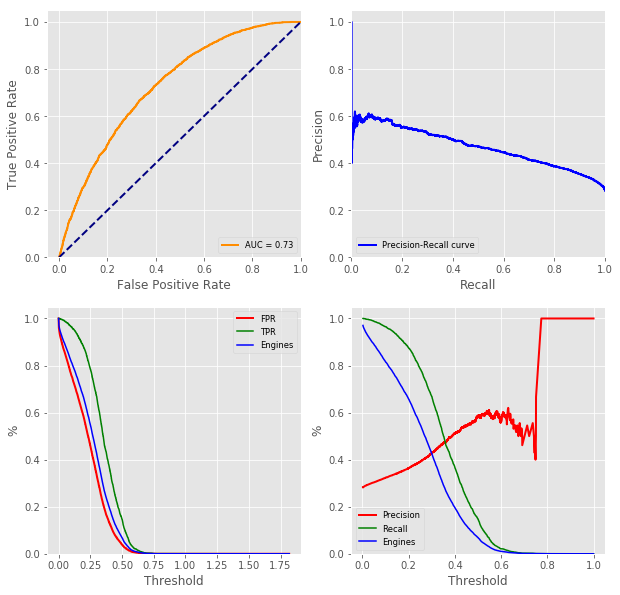

In [74]:
model = 'Logistic Regression'
clf_lgrb = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10, 100], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgrb)

metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, 
                                                     pred_lgrb.y_score, print_out=True, 
                                                     plot_out=True)


Best Parameters:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
-----------------------------------------------------------
Decision Tree 

Confusion Matrix:
[[5798  173]
 [2014  234]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      5971
           1       0.57      0.10      0.18      2248

   micro avg       0.73      0.73      0.73      8219
   macro avg       0.66      0.54      0.51      8219
weighted avg       0.70      0.73      0.66      8219


Metrics:
           Decision Tree
Accuracy        0.733909
Precision       0.574939
Recall          0.104093
F1 Score        0.176271
ROC AUC         0.716900

RO

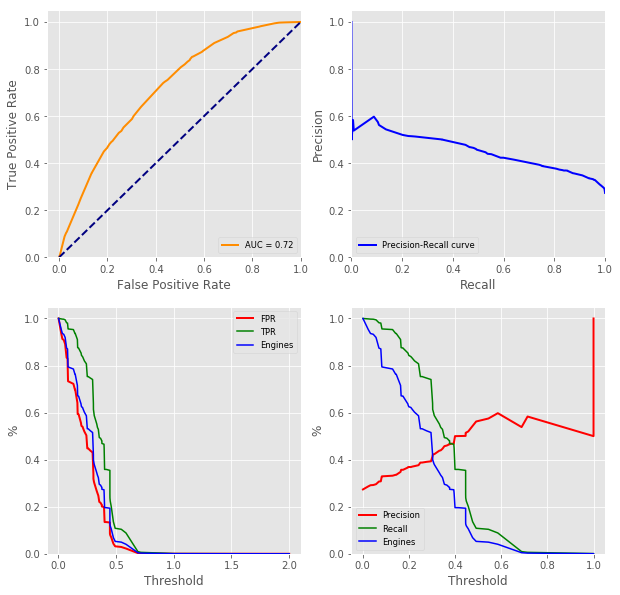

In [42]:
model = 'Decision Tree'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, pred_dtrb = bin_classify(model, clf_dtrb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtrb)

metrics_dtrb, roc_dtrb, prc_dtrb = bin_class_metrics(model, y_test, pred_dtrb.y_pred, 
                                                     pred_dtrb.y_score, print_out=True, 
                                                     plot_out=True)


Best Parameters:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
-----------------------------------------------------------
Random Forest 

Confusion Matrix:
[[5965    6]
 [2224   24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      5971
           1       0.80      0.01      0.02      2248

   micro avg       0.73      0.73      0.73      8219
   macro avg       0.76      0.50      0.43      8219
weighted avg       0.75      0.73      0.62      8219


Metrics:
           Random Forest
Accuracy        0.728677
Precision       0.800000
Recall         

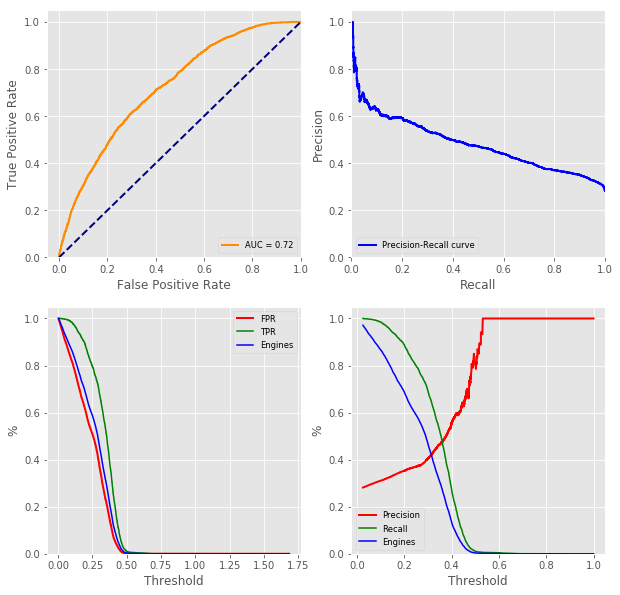

In [44]:
model = 'Random Forest'
clf_rfcb = RandomForestClassifier(n_estimators=200, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, 
                                                     pred_rfcb.y_score, print_out=True, 
                                                     plot_out=True)


Best Parameters:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False)
-----------------------------------------------------------
SVC 

Confusion Matrix:
[[5966    5]
 [2241    7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      5971
           1       0.58      0.00      0.01      2248

   micro avg       0.73      0.73      0.73      8219
   macro avg       0.66      0.50      0.42      8219
weighted avg       0.69      0.73      0.61      8219


Metrics:
                SVC
Accuracy   0.726731
Precision  0.583333
Recall     0.003114
F1 Score   0.006195
ROC AUC    0.680154

ROC Thresholds:

      Threshold  TP  FP  TN  FN       TPR       FPR  TNR       FNR       Que
0      1.916608   0  25  75   0  0.000000  0.000000  1.0  0

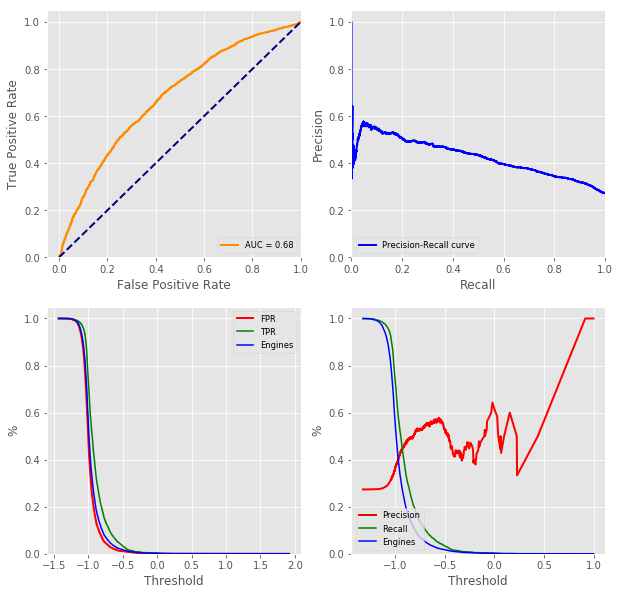

In [17]:
model = 'SVC'
clf_svcb = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svcb, pred_svcb = bin_classify(model, clf_svcb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svcb)

metrics_svcb, roc_svcb, prc_svcb = bin_class_metrics(model, y_test, pred_svcb.y_pred, 
                                                     pred_svcb.y_score, print_out=True, 
                                                     plot_out=True)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Best Parameters:
 LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)
-----------------------------------------------------------
SVC Linear 

Confusion Matrix:
[[5833  138]
 [2057  191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      5971
           1       0.58      0.08      0.15      2248

   micro avg       0.73      0.73      0.73      8219
   macro avg       0.66      0.53      0.49      8219
weighted avg       0.70      0.73      0.65      8219


Metrics:
           SVC Linear
Accuracy     0.732936
Precision    0.580547
Recall       0.084964
F1 Score     0.148234
ROC AUC      0.728653

ROC Thresholds:

      Threshold  TP  FP  TN  FN       TPR       FPR       TNR       FNR  \
0      1.508067   0  25  75   0  0.000000  0.000000  1.000000  

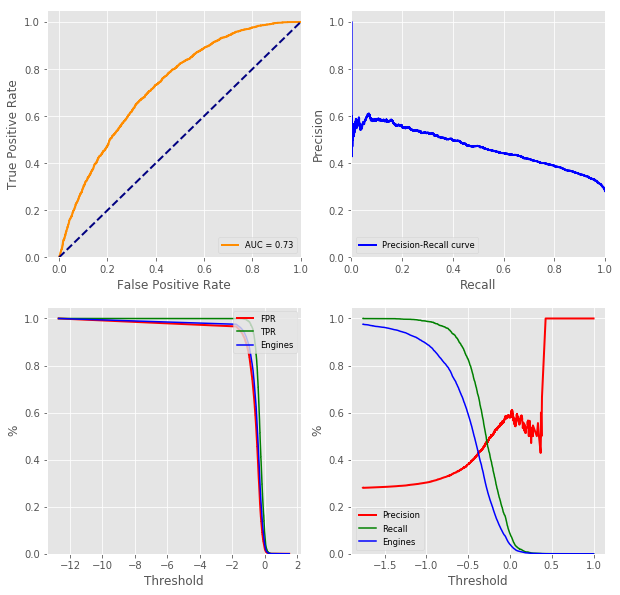

In [18]:
model = 'SVC Linear'
clf_svlb = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svlb, pred_svlb = bin_classify(model, clf_svlb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svlb)

metrics_svlb, roc_svlb, prc_svlb = bin_class_metrics(model, y_test, pred_svlb.y_pred, 
                                                     pred_svlb.y_score, print_out=True, 
                                                     plot_out=True)


Best Parameters:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
           weights='uniform')
-----------------------------------------------------------
KNN 

Confusion Matrix:
[[5492  479]
 [1863  385]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82      5971
           1       0.45      0.17      0.25      2248

   micro avg       0.72      0.72      0.72      8219
   macro avg       0.60      0.55      0.54      8219
weighted avg       0.66      0.72      0.67      8219


Metrics:
                KNN
Accuracy   0.715050
Precision  0.445602
Recall     0.171263
F1 Score   0.247429
ROC AUC    0.663885

ROC Thresholds:

    Threshold  TP  FP  TN  FN       TPR       FPR       TNR       FNR  \
0    2.000000   0  25  75   0  0.000000  0.000000  1.000000  0.750000   
1    1.000000   0  24  75   0  0.000445  0.000000  1.000000

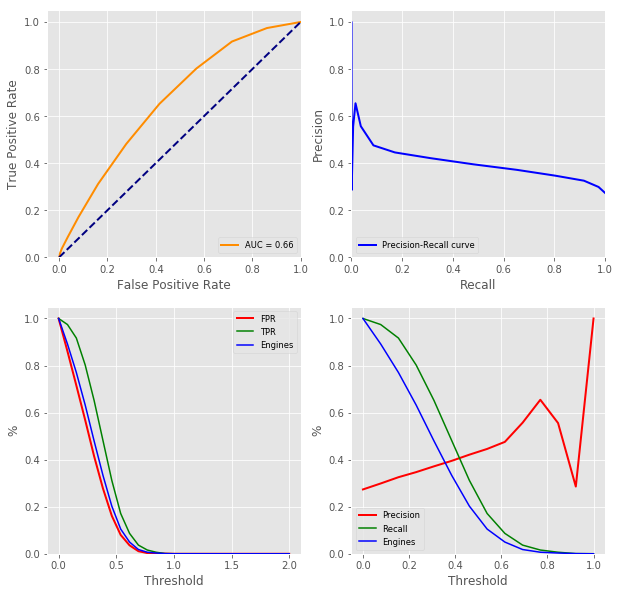

In [19]:
model = 'KNN'
clf_knnb = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knnb, pred_knnb = bin_classify(model, clf_knnb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knnb)

metrics_knnb, roc_knnb, prc_knnb = bin_class_metrics(model, y_test, pred_knnb.y_pred, 
                                                     pred_knnb.y_score, print_out=True, 
                                                     plot_out=True)


Best Parameters:
 GaussianNB(priors=None, var_smoothing=1e-09)
-----------------------------------------------------------
Gaussian NB 

Confusion Matrix:
[[2237 3734]
 [ 346 1902]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.37      0.52      5971
           1       0.34      0.85      0.48      2248

   micro avg       0.50      0.50      0.50      8219
   macro avg       0.60      0.61      0.50      8219
weighted avg       0.72      0.50      0.51      8219


Metrics:
           Gaussian NB
Accuracy      0.503589
Precision     0.337473
Recall        0.846085
F1 Score      0.482496
ROC AUC       0.650577

ROC Thresholds:

          Threshold  TP  FP  TN  FN       TPR       FPR       TNR       FNR  \
0      2.000000e+00   0  25  75   0  0.000000  0.000000  1.000000  0.750000   
1      1.000000e+00  17   7  41  33  0.697064  0.446826  0.554054  0.854167   
2      1.000000e+00  17   7  40  34  0.702402  0.454363  0.5405

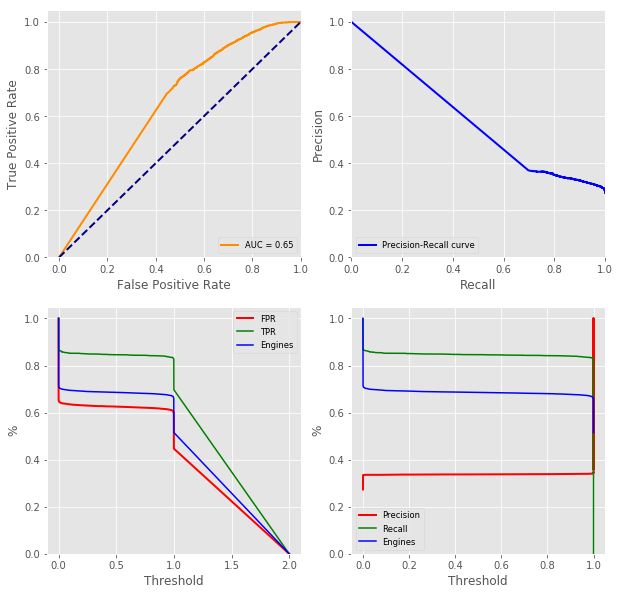

In [20]:
model = 'Gaussian NB'
clf_gnbb = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)

metrics_gnbb, roc_gnbb, prc_gnbb = bin_class_metrics(model, y_test, pred_gnbb.y_pred, 
                                                     pred_gnbb.y_score, print_out=True, 
                                                     plot_out=True)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Best Parameters:
 VotingClassifier(estimators=[('lgr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dtr', Decisio...dom_state=123, verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)
-----------------------------------------------------------
Voting Classifier 

Confusion Matrix:
[[4543 1428]
 [1007 1241]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      5971
           1       0.46      0.55      0.50      2248

   micro avg       0.70      0.70      0.70      8219
   macro avg       0.64      0.66      0.65      8219
weighted avg       0.72      0.70      0.71      8219


Metrics

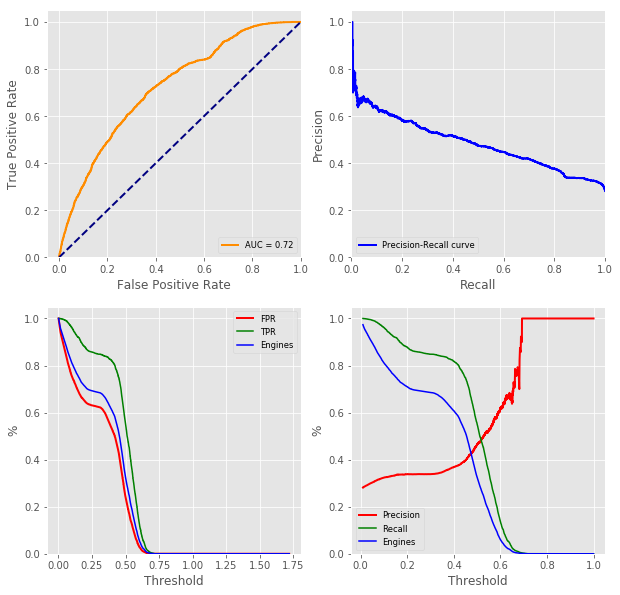

In [70]:
model = "Voting Classifier"
clf_vtg = VotingClassifier([("lgr", clf_lgrb),
                            ("dtr", clf_dtrb),
                            ("rf", clf_rfcb),
                            ("gnb", clf_gnbb)],
                           voting="soft")
gs_params = {} 
gs_score = 'roc_auc'

clf_vtg, pred_vtg = bin_classify(model, clf_vtg, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_vtg)

metrics_vtg, roc_vtg, prc_vtg = bin_class_metrics(model, y_test, pred_vtg.y_pred, 
                                                     pred_vtg.y_score, print_out=True, 
                                                     plot_out=True)

In [71]:
#compare all models
metrics_bn = pd.concat([metrics_lgrb, metrics_dtrb, metrics_rfcb, metrics_svcb, 
                        metrics_svlb, metrics_knnb, metrics_gnbb, metrics_vtg], axis=1)
metrics_bn

,Logistic Regression,Decision Tree,Random Forest,SVC,SVC Linear,KNN,Gaussian NB,Voting Classifier
Accuracy,0.737803,0.733909,0.728677,0.726731,0.732936,0.715050,0.503589,0.703735
Precision,0.581722,0.574939,0.800000,0.583333,0.580547,0.445602,0.337473,0.464968
Recall,0.147242,0.104093,0.010676,0.003114,0.084964,0.171263,0.846085,0.552046
F1 Score,0.235002,0.176271,0.021071,0.006195,0.148234,0.247429,0.482496,0.504779
ROC AUC,0.729140,0.716900,0.722289,0.680154,0.728653,0.663885,0.650577,0.723948


Text(0.5, 1.0, 'Precision Recall Curve')

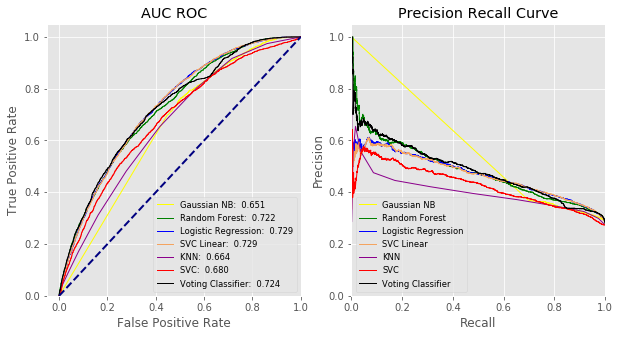

In [72]:
# Plot AUC-ROC and precision-recall curves for best models

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(10,5)

ax1.plot(roc_gnbb.FPR, roc_gnbb.TPR, color='yellow', 
         lw=1, label= metrics_gnbb.columns.values.tolist()[0] + ':  %.3f' % 
         metrics_gnbb.at['ROC AUC', metrics_gnbb.columns.values.tolist()[0]])
ax1.plot(roc_rfcb.FPR, roc_rfcb.TPR, color='green', 
         lw=1, label= metrics_rfcb.columns.values.tolist()[0] + ':  %.3f' % 
         metrics_rfcb.at['ROC AUC', metrics_rfcb.columns.values.tolist()[0]])
ax1.plot(roc_lgrb.FPR, roc_lgrb.TPR, color='blue', 
         lw=1, label= metrics_lgrb.columns.values.tolist()[0] + ':  %.3f' % 
         metrics_lgrb.at['ROC AUC', metrics_lgrb.columns.values.tolist()[0]])
ax1.plot(roc_svlb.FPR, roc_svlb.TPR, color='sandybrown', 
         lw=1, label= metrics_svlb.columns.values.tolist()[0] + ':  %.3f' % 
         metrics_svlb.at['ROC AUC', metrics_svlb.columns.values.tolist()[0]])
ax1.plot(roc_knnb.FPR, roc_knnb.TPR, color='darkmagenta', 
         lw=1, label= metrics_knnb.columns.values.tolist()[0] + ':  %.3f' % 
         metrics_knnb.at['ROC AUC', metrics_knnb.columns.values.tolist()[0]])
ax1.plot(roc_svcb.FPR, roc_svcb.TPR, color='red', 
         lw=1, label= metrics_svcb.columns.values.tolist()[0] + ':  %.3f' % 
         metrics_svcb.at['ROC AUC', metrics_svcb.columns.values.tolist()[0]])
ax1.plot(roc_vtg.FPR, roc_vtg.TPR, color='black', 
         lw=1, label= metrics_vtg.columns.values.tolist()[0] + ':  %.3f' % 
         metrics_vtg.at['ROC AUC', metrics_vtg.columns.values.tolist()[0]])

ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right", fontsize='small')
ax1.set_title('AUC ROC')

ax2.plot(prc_gnbb.Recall, prc_gnbb.Precision, color='yellow', 
         lw=1, label= metrics_gnbb.columns.values.tolist()[0])
ax2.plot(prc_rfcb.Recall, prc_rfcb.Precision, color='green', 
         lw=1, label= metrics_rfcb.columns.values.tolist()[0])
ax2.plot(prc_lgrb.Recall, prc_lgrb.Precision, color='blue', 
         lw=1, label= metrics_lgrb.columns.values.tolist()[0])
ax2.plot(prc_svlb.Recall, prc_svlb.Precision, color='sandybrown', 
         lw=1, label= metrics_svlb.columns.values.tolist()[0])
ax2.plot(prc_knnb.Recall, prc_knnb.Precision, color='darkmagenta', 
         lw=1, label= metrics_knnb.columns.values.tolist()[0])
ax2.plot(prc_svcb.Recall, prc_svcb.Precision, color='red', 
         lw=1, label= metrics_svcb.columns.values.tolist()[0])
ax2.plot(prc_vtg.Recall, prc_vtg.Precision, color='black', 
         lw=1, label= metrics_vtg.columns.values.tolist()[0])

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left", fontsize='small')
ax2.set_title('Precision Recall Curve')

In [82]:
#
# Predict REAL test data
#

In [83]:
X_train = df_train[features]
y_train = df_train['Status']
X_test = df_test[features]

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [84]:
model = 'Logistic Regression'
clf_lgrb = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10, 100], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgrb)


Best Parameters:
 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [92]:
model = 'Decision Tree'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, pred_dtrb = bin_classify(model, clf_dtrb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtrb)


Best Parameters:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')


In [93]:
model = 'Random Forest'
clf_rfcb = RandomForestClassifier(n_estimators=200, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)


Best Parameters:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)


In [94]:
model = 'Gaussian NB'
clf_gnbb = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)


Best Parameters:
 GaussianNB(priors=None, var_smoothing=1e-09)


In [95]:
model = "Voting Classifier"
clf_vtg = VotingClassifier([("lgr", clf_lgrb),
                            ("dtr", clf_dtrb),
                            ("rf", clf_rfcb),
                            ("gnb", clf_gnbb)],
                           voting="soft")
gs_params = {} 
gs_score = 'roc_auc'

clf_vtg, pred_vtg = bin_classify(model, clf_vtg, X_train, X_test, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_vtg)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



Best Parameters:
 VotingClassifier(estimators=[('lgr', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('dtr', Decisi...dom_state=123, verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


In [134]:
result = pd.concat([df_test["EventId"], pred_vtg["y_pred"].rename("Status")], axis=1)
result.head()

,EventId,Status
0,79,0
1,94,1
2,98,1
3,113,1
4,1096,0


In [138]:
# import os

# os.chdir("data")
# result.to_csv("EventId_Status.csv", index=False, sep=",")